In [29]:
%matplotlib inline
from sklearn import datasets
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle
import numpy as np

In [52]:
model = "FiLM"
n_componets  = 1 if model == "FiLM" else 2
manifold_dir = './exp/film-exp-1/manifold_src.pickle'
num_cat      = 2
figsize      = (9,6)
label_names  = ["non_rel", "rel"]

print(label_names)

['non_rel', 'rel']


In [31]:
manifold_src = pickle.load(open(manifold_dir, 'rb'))
label = manifold_src['label']
tsne = TSNE(n_components=n_componets, random_state=0)
gamma_1 = tsne.fit_transform(manifold_src['gamma_1'])
beta_1  = tsne.fit_transform(manifold_src['beta_1'])
gamma_4 = tsne.fit_transform(manifold_src['gamma_4'])
beta_4  = tsne.fit_transform(manifold_src['beta_4'])

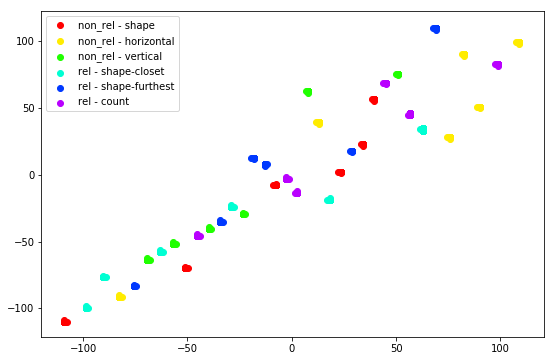

In [86]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = gamma_1[labels[:,0] == idx]
    dim_2 = beta_1[labels[:,0] == idx]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

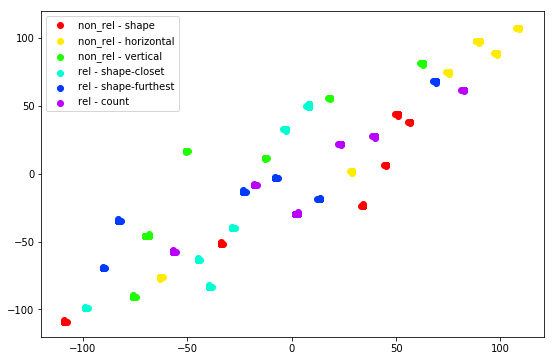

In [87]:
# higher FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = gamma_4[labels[:,0] == idx]
    dim_2 = beta_4[labels[:,0] == idx]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

In [85]:
# -------------------------------------------------------
# gamma + beta as embedding
# -------------------------------------------------------

In [47]:
tsne = TSNE(n_components=2, random_state=0)
#param_1 = np.concatenate([manifold_src['gamma_1'], manifold_src['beta_1']], axis=1)
#param_1_reduced = tsne.fit_transform(param_1)
param_4 = np.concatenate([manifold_src['gamma_4'], manifold_src['beta_4']], axis=1)
param_4_reduced = tsne.fit_transform(param_4)

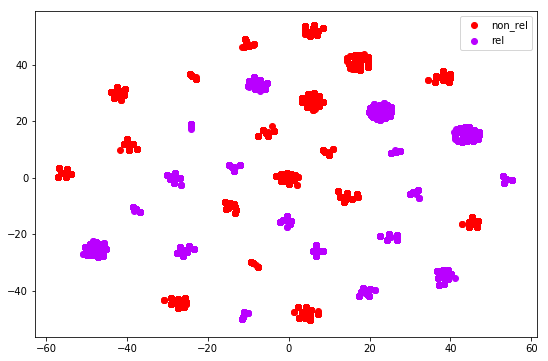

In [44]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, num_cat), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_1_reduced[label[:,0] == idx,0]
    dim_2 = param_1_reduced[label[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

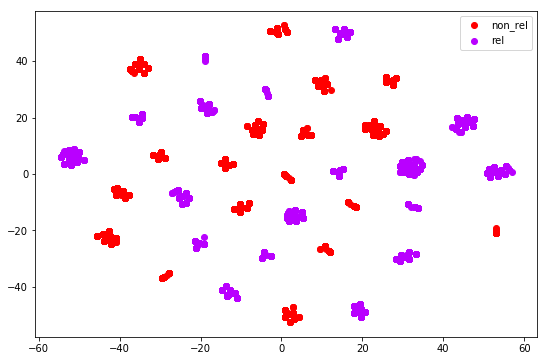

In [48]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, num_cat), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_4_reduced[label[:,0] == idx,0]
    dim_2 = param_4_reduced[label[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------
# detaild question type
#--------------------------------------------------------------------------------------

In [78]:
nonrel_label_names = ["non_rel - shape", "non_rel - horizontal", "non_rel - vertical"]
rel_label_names = ["rel - shape-closet", "rel - shape-furthest", "rel - count"]
label_names = nonrel_label_names + rel_label_names
print(label_names)

['non_rel - shape', 'non_rel - horizontal', 'non_rel - vertical', 'rel - shape-closet', 'rel - shape-furthest', 'rel - count']


In [79]:
labels = np.zeros((manifold_src['label'].shape[0], 1))
for idx in range(labels.shape[0]):
    main_type = manifold_src['label'][idx][0] * 3
    if manifold_src['label'][idx][-3]:
        sub_type = 0
    if manifold_src['label'][idx][-2]:
        sub_type = 1
    if manifold_src['label'][idx][-1]:
        sub_type = 2
    labels[idx] = main_type + sub_type

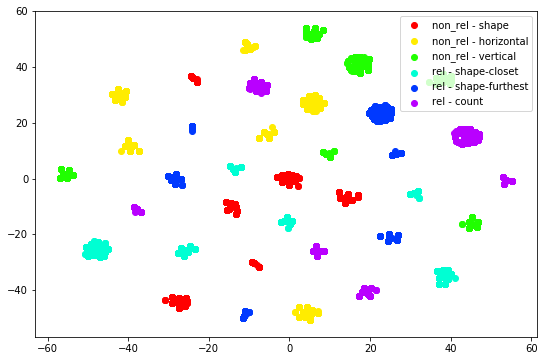

In [83]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_1_reduced[labels[:,0] == idx,0]
    dim_2 = param_1_reduced[labels[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

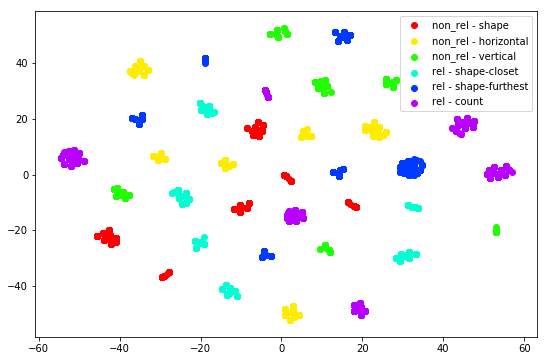

In [84]:
# higher FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_4_reduced[labels[:,0] == idx,0]
    dim_2 = param_4_reduced[labels[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()